In [51]:
set.seed(20)

library(dplyr)
library(caret)
library(tidyr)
library(ggplot2)

In [12]:
supervised_algorithms <- c("CART",
                           "naiveBayes",
                           "neuralNetwork",
                           "randomForest",
                           "SVM_linear",
                           "SVM_polynomial",
                           "SVM_radial", 
                           "SVM_sigmoid")
unsupervised_algorithms <- c("DBSCAN",
                             "kmeans",
                             "LOF")

semi_supervised_algorithms <- c("oneClassSVM_linear",
                                "oneClassSVM_polynomial",
                                "oneClassSVM_radial",
                                "oneClassSVM_sigmoid")

# 1) Technique Performance Study

In [13]:
f_measure <- function(precision, recall, beta = 1)
{
  (1 + beta^2) * ((precision * recall) / ((precision * beta^2) + recall))
}

In [14]:
evaluation_algorithms <- read.csv("results_evaluation/algorithms_metrics_2017-06-15.csv") %>% rename(algorithm_f1 = f1,
                                                                                                    algorithm_precision = precision,
                                                                                                    algorithm_recall = recall)

In [15]:
evaluation_algorithms <- evaluation_algorithms %>% mutate(algorithm_f20 = f_measure(algorithm_precision,
                                                                                    algorithm_recall,
                                                                                    beta = 2),
                                                          algorithm_f05 = f_measure(algorithm_precision,
                                                                                    algorithm_recall,
                                                                                    beta = 0.5))

# 1.1) Best Algorithm in F1

In [17]:
evaluation_algorithms %>% group_by(dataset) %>% top_n(1, algorithm_f1) %>% select(-algorithm_f20, -algorithm_f05)

dataset,algorithm,variant,algorithm_f1,algorithm_precision,algorithm_recall
dataset_aloi,randomForest,rf,0.5895966,0.6000766,0.5795629
dataset_iono,SVM_radial,SVM_radial,0.9331795,0.9294872,0.9371795
dataset_kdd,randomForest,rf,0.8521795,0.8544737,0.8500000
dataset_pen,neuralNetwork,mlp,1.0000000,1.0000000,1.0000000
dataset_shuttle,CART,cart,0.9000000,0.9000000,0.9000000
dataset_waveform,SVM_radial,SVM_radial,0.6000000,0.6000000,0.6000000
dataset_wbc,randomForest,rf,0.9000000,0.9000000,0.9000000
dataset_wdbc,naiveBayes,nb,0.9000000,0.9000000,0.9000000
dataset_wdbc,neuralNetwork,mlp,0.9000000,0.9000000,0.9000000
dataset_wdbc,SVM_linear,SVM_linear,0.9000000,0.9000000,0.9000000


In [18]:
evaluation_algorithms %>%
  filter(algorithm %in% supervised_algorithms) %>%
  group_by(dataset) %>%
  top_n(1, algorithm_f1) %>%
  select(-algorithm_f20, -algorithm_f05)

dataset,algorithm,variant,algorithm_f1,algorithm_precision,algorithm_recall
dataset_aloi,randomForest,rf,0.5895966,0.6000766,0.5795629
dataset_iono,SVM_radial,SVM_radial,0.9331795,0.9294872,0.9371795
dataset_kdd,randomForest,rf,0.8521795,0.8544737,0.8500000
dataset_pen,neuralNetwork,mlp,1.0000000,1.0000000,1.0000000
dataset_shuttle,CART,cart,0.9000000,0.9000000,0.9000000
dataset_waveform,SVM_radial,SVM_radial,0.6000000,0.6000000,0.6000000
dataset_wbc,randomForest,rf,0.9000000,0.9000000,0.9000000
dataset_wdbc,naiveBayes,nb,0.9000000,0.9000000,0.9000000
dataset_wdbc,neuralNetwork,mlp,0.9000000,0.9000000,0.9000000
dataset_wdbc,SVM_linear,SVM_linear,0.9000000,0.9000000,0.9000000


In [19]:
evaluation_algorithms %>%
  filter(algorithm %in% unsupervised_algorithms) %>%
  group_by(dataset) %>%
  top_n(1, algorithm_f1) %>%
  select(-algorithm_f20, -algorithm_f05)

dataset,algorithm,variant,algorithm_f1,algorithm_precision,algorithm_recall
dataset_aloi,LOF,lof_03,0.2068966,0.2068966,0.2068966
dataset_iono,kmeans,kmeans_25,0.8492063,0.8492063,0.8492063
dataset_kdd,kmeans,kmeans_08,0.5600000,0.5600000,0.5600000
dataset_pen,LOF,lof_03,0.0500000,0.0500000,0.0500000
dataset_pen,LOF,lof_05,0.0500000,0.0500000,0.0500000
dataset_pen,LOF,lof_08,0.0500000,0.0500000,0.0500000
dataset_pen,LOF,lof_14,0.0500000,0.0500000,0.0500000
dataset_pen,LOF,lof_19,0.0500000,0.0500000,0.0500000
dataset_shuttle,DBSCAN,dbscan_1.1,0.4905660,0.3250000,1.0000000
dataset_waveform,kmeans,kmeans_30,0.2100000,0.2100000,0.2100000


In [20]:
evaluation_algorithms %>%
  filter(algorithm %in% semi_supervised_algorithms) %>%
  group_by(dataset) %>%
  top_n(1, algorithm_f1) %>%
  select(-algorithm_f20, -algorithm_f05)

dataset,algorithm,variant,algorithm_f1,algorithm_precision,algorithm_recall
dataset_aloi,oneClassSVM_radial,oneClassSVM_radial,0.065973082,0.034984664,0.5776777
dataset_iono,oneClassSVM_radial,oneClassSVM_radial,0.675022325,0.518401491,0.9769231
dataset_kdd,oneClassSVM_radial,oneClassSVM_radial,0.016418152,0.008277033,1.0000000
dataset_pen,oneClassSVM_polynomial,oneClassSVM_polynomial,0.008027038,0.004029698,1.0000000
dataset_shuttle,oneClassSVM_radial,oneClassSVM_radial,0.049087824,0.025233064,1.0000000
dataset_waveform,oneClassSVM_radial,oneClassSVM_radial,0.087428604,0.046215005,0.8100000
dataset_wbc,oneClassSVM_radial,oneClassSVM_radial,0.169320402,0.093453116,1.0000000
dataset_wdbc,oneClassSVM_radial,oneClassSVM_radial,0.099780293,0.052559335,1.0000000
dataset_wpbc,oneClassSVM_polynomial,oneClassSVM_polynomial,0.358608347,0.235025995,0.7750000
dataset_ann,oneClassSVM_radial,oneClassSVM_radial,0.202801067,0.115936939,0.8091894


# 1.2) Best Algorithm in F2

In [21]:
evaluation_algorithms %>% group_by(dataset) %>% top_n(1, algorithm_f20) %>% select(-algorithm_f1, -algorithm_f05)

dataset,algorithm,variant,algorithm_precision,algorithm_recall,algorithm_f20
dataset_aloi,randomForest,rf,0.6000766,0.5795629,0.5835527
dataset_iono,SVM_radial,SVM_radial,0.9294872,0.9371795,0.9356309
dataset_kdd,randomForest,rf,0.8544737,0.8500000,0.8508910
dataset_pen,neuralNetwork,mlp,1.0000000,1.0000000,1.0000000
dataset_shuttle,randomForest,rf,0.7000000,1.0000000,0.9210526
dataset_shuttle,SVM_radial,SVM_radial,0.7000000,1.0000000,0.9210526
dataset_waveform,SVM_radial,SVM_radial,0.6000000,0.6000000,0.6000000
dataset_wbc,randomForest,rf,0.9000000,0.9000000,0.9000000
dataset_wdbc,naiveBayes,nb,0.9000000,0.9000000,0.9000000
dataset_wdbc,neuralNetwork,mlp,0.9000000,0.9000000,0.9000000


In [22]:
evaluation_algorithms %>%
  filter(algorithm %in% supervised_algorithms) %>%
  group_by(dataset) %>%
  top_n(1, algorithm_f20) %>%
  select(-algorithm_f1, -algorithm_f05)

dataset,algorithm,variant,algorithm_precision,algorithm_recall,algorithm_f20
dataset_aloi,randomForest,rf,0.6000766,0.5795629,0.5835527
dataset_iono,SVM_radial,SVM_radial,0.9294872,0.9371795,0.9356309
dataset_kdd,randomForest,rf,0.8544737,0.8500000,0.8508910
dataset_pen,neuralNetwork,mlp,1.0000000,1.0000000,1.0000000
dataset_shuttle,randomForest,rf,0.7000000,1.0000000,0.9210526
dataset_shuttle,SVM_radial,SVM_radial,0.7000000,1.0000000,0.9210526
dataset_waveform,SVM_radial,SVM_radial,0.6000000,0.6000000,0.6000000
dataset_wbc,randomForest,rf,0.9000000,0.9000000,0.9000000
dataset_wdbc,naiveBayes,nb,0.9000000,0.9000000,0.9000000
dataset_wdbc,neuralNetwork,mlp,0.9000000,0.9000000,0.9000000


In [23]:
evaluation_algorithms %>%
  filter(algorithm %in% unsupervised_algorithms) %>%
  group_by(dataset) %>%
  top_n(1, algorithm_f20) %>%
  select(-algorithm_f1, -algorithm_f05)

dataset,algorithm,variant,algorithm_precision,algorithm_recall,algorithm_f20
dataset_aloi,LOF,lof_03,0.20689655,0.2068966,0.2068966
dataset_iono,kmeans,kmeans_25,0.84920635,0.8492063,0.8492063
dataset_kdd,kmeans,kmeans_08,0.56000000,0.5600000,0.5600000
dataset_pen,LOF,lof_03,0.05000000,0.0500000,0.0500000
dataset_pen,LOF,lof_05,0.05000000,0.0500000,0.0500000
dataset_pen,LOF,lof_08,0.05000000,0.0500000,0.0500000
dataset_pen,LOF,lof_14,0.05000000,0.0500000,0.0500000
dataset_pen,LOF,lof_19,0.05000000,0.0500000,0.0500000
dataset_shuttle,DBSCAN,dbscan_1.1,0.32500000,1.0000000,0.7065217
dataset_waveform,kmeans,kmeans_30,0.21000000,0.2100000,0.2100000


In [24]:
evaluation_algorithms %>%
  filter(algorithm %in% semi_supervised_algorithms) %>%
  group_by(dataset) %>%
  top_n(1, algorithm_f20) %>%
  select(-algorithm_f1, -algorithm_f05)

dataset,algorithm,variant,algorithm_precision,algorithm_recall,algorithm_f20
dataset_aloi,oneClassSVM_radial,oneClassSVM_radial,0.034984664,0.5776777,0.14081243
dataset_iono,oneClassSVM_radial,oneClassSVM_radial,0.518401491,0.9769231,0.83008287
dataset_kdd,oneClassSVM_radial,oneClassSVM_radial,0.008277033,1.0000000,0.04005889
dataset_pen,oneClassSVM_polynomial,oneClassSVM_polynomial,0.004029698,1.0000000,0.01982887
dataset_shuttle,oneClassSVM_radial,oneClassSVM_radial,0.025233064,1.0000000,0.11459862
dataset_waveform,oneClassSVM_radial,oneClassSVM_radial,0.046215005,0.8100000,0.18813779
dataset_wbc,oneClassSVM_radial,oneClassSVM_radial,0.093453116,1.0000000,0.34012326
dataset_wdbc,oneClassSVM_radial,oneClassSVM_radial,0.052559335,1.0000000,0.21714474
dataset_wpbc,oneClassSVM_polynomial,oneClassSVM_polynomial,0.235025995,0.7750000,0.53100322
dataset_ann,oneClassSVM_radial,oneClassSVM_radial,0.115936939,0.8091894,0.36849793


# 1.3) Best Algorithm in F0.5

In [25]:
evaluation_algorithms %>% group_by(dataset) %>% top_n(1, algorithm_f05) %>% select(-algorithm_f1, -algorithm_f20)

dataset,algorithm,variant,algorithm_precision,algorithm_recall,algorithm_f05
dataset_aloi,randomForest,rf,0.6000766,0.5795629,0.5958585
dataset_iono,SVM_radial,SVM_radial,0.9294872,0.9371795,0.9310155
dataset_kdd,randomForest,rf,0.8544737,0.8500000,0.8535752
dataset_pen,neuralNetwork,mlp,1.0000000,1.0000000,1.0000000
dataset_shuttle,CART,cart,0.9000000,0.9000000,0.9000000
dataset_waveform,SVM_radial,SVM_radial,0.6000000,0.6000000,0.6000000
dataset_wbc,randomForest,rf,0.9000000,0.9000000,0.9000000
dataset_wdbc,naiveBayes,nb,0.9000000,0.9000000,0.9000000
dataset_wdbc,neuralNetwork,mlp,0.9000000,0.9000000,0.9000000
dataset_wdbc,SVM_linear,SVM_linear,0.9000000,0.9000000,0.9000000


In [26]:
evaluation_algorithms %>%
  filter(algorithm %in% supervised_algorithms) %>%
  group_by(dataset) %>%
  top_n(1, algorithm_f05) %>%
  select(-algorithm_f1, -algorithm_f20)

dataset,algorithm,variant,algorithm_precision,algorithm_recall,algorithm_f05
dataset_aloi,randomForest,rf,0.6000766,0.5795629,0.5958585
dataset_iono,SVM_radial,SVM_radial,0.9294872,0.9371795,0.9310155
dataset_kdd,randomForest,rf,0.8544737,0.8500000,0.8535752
dataset_pen,neuralNetwork,mlp,1.0000000,1.0000000,1.0000000
dataset_shuttle,CART,cart,0.9000000,0.9000000,0.9000000
dataset_waveform,SVM_radial,SVM_radial,0.6000000,0.6000000,0.6000000
dataset_wbc,randomForest,rf,0.9000000,0.9000000,0.9000000
dataset_wdbc,naiveBayes,nb,0.9000000,0.9000000,0.9000000
dataset_wdbc,neuralNetwork,mlp,0.9000000,0.9000000,0.9000000
dataset_wdbc,SVM_linear,SVM_linear,0.9000000,0.9000000,0.9000000


In [27]:
evaluation_algorithms %>%
  filter(algorithm %in% unsupervised_algorithms) %>%
  group_by(dataset) %>%
  top_n(1, algorithm_f05) %>%
  select(-algorithm_f1, -algorithm_f20)

dataset,algorithm,variant,algorithm_precision,algorithm_recall,algorithm_f05
dataset_aloi,LOF,lof_03,0.2068966,0.2068966,0.2068966
dataset_iono,kmeans,kmeans_25,0.8492063,0.8492063,0.8492063
dataset_kdd,kmeans,kmeans_08,0.5600000,0.5600000,0.5600000
dataset_pen,LOF,lof_03,0.0500000,0.0500000,0.0500000
dataset_pen,LOF,lof_05,0.0500000,0.0500000,0.0500000
dataset_pen,LOF,lof_08,0.0500000,0.0500000,0.0500000
dataset_pen,LOF,lof_14,0.0500000,0.0500000,0.0500000
dataset_pen,LOF,lof_19,0.0500000,0.0500000,0.0500000
dataset_shuttle,kmeans,kmeans_14,0.3846154,0.3846154,0.3846154
dataset_shuttle,kmeans,kmeans_19,0.3846154,0.3846154,0.3846154


In [28]:
evaluation_algorithms %>%
  filter(algorithm %in% semi_supervised_algorithms) %>%
  group_by(dataset) %>%
  top_n(1, algorithm_f05) %>%
  select(-algorithm_f1, -algorithm_f20)

dataset,algorithm,variant,algorithm_precision,algorithm_recall,algorithm_f05
dataset_aloi,oneClassSVM_radial,oneClassSVM_radial,0.034984664,0.5776777,0.043078611
dataset_iono,oneClassSVM_radial,oneClassSVM_radial,0.518401491,0.9769231,0.572105340
dataset_kdd,oneClassSVM_radial,oneClassSVM_radial,0.008277033,1.0000000,0.010324927
dataset_pen,oneClassSVM_polynomial,oneClassSVM_polynomial,0.004029698,1.0000000,0.005032053
dataset_shuttle,oneClassSVM_radial,oneClassSVM_radial,0.025233064,1.0000000,0.031343606
dataset_waveform,oneClassSVM_radial,oneClassSVM_radial,0.046215005,0.8100000,0.056956337
dataset_wbc,oneClassSVM_radial,oneClassSVM_radial,0.093453116,1.0000000,0.114149488
dataset_wdbc,oneClassSVM_radial,oneClassSVM_radial,0.052559335,1.0000000,0.064847089
dataset_wpbc,oneClassSVM_radial,oneClassSVM_radial,0.253767066,0.5900000,0.286411462
dataset_ann,oneClassSVM_radial,oneClassSVM_radial,0.115936939,0.8091894,0.139909767


# 1.4) Do the algorithms have better performance than random guessing, considering the F1 metric?

In [47]:
calc_better_random <- function()
{
  random_guess <- evaluation_algorithms %>%
    group_by(dataset) %>%
    filter(algorithm == "random") %>%
    select(dataset, random_f1 = algorithm_f1)
  
  number_variants <- evaluation_algorithms %>% .$variant %>% unique %>% length
  
  evaluation_algorithms %>%
    select(-algorithm_precision, -algorithm_recall, -algorithm_f20, -algorithm_f05) %>%
    left_join(random_guess, by="dataset") %>%
    filter(algorithm_f1 > random_f1) %>%
    group_by(dataset) %>%
    summarise(better_than_random = n(), better_than_random_ratio = n()/number_variants)
}

calc_better_random()

dataset,better_than_random,better_than_random_ratio
dataset_ads,24,0.75000
dataset_aloi,30,0.93750
dataset_ann,31,0.96875
dataset_arr,30,0.93750
dataset_blocks,30,0.93750
dataset_cardio,29,0.90625
dataset_heart,27,0.84375
dataset_hepatitis,24,0.75000
dataset_iono,29,0.90625
dataset_kdd,30,0.93750


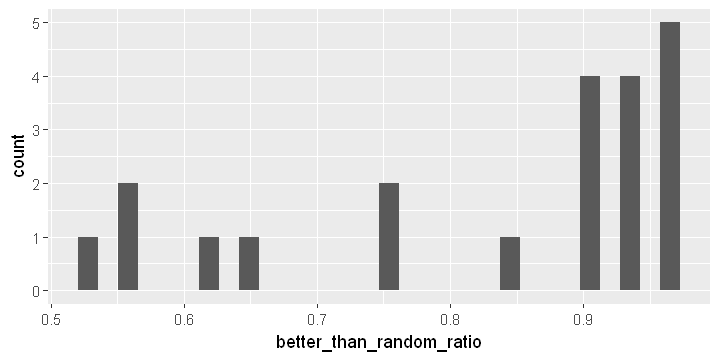

In [115]:
options(repr.plot.width=6, repr.plot.height=3)
calc_better_random() %>% ggplot(aes(better_than_random_ratio)) + geom_histogram(bins = 30)

In [75]:
options(repr.matrix.max.rows=600, repr.matrix.max.cols=200)
calc_worse_random_algorithms <- function()
{
  random_guess <- evaluation_algorithms %>%
    group_by(dataset) %>%
    filter(algorithm == "random") %>%
    select(dataset, random_f1 = algorithm_f1)
  
  evaluation_algorithms %>%
    select(-algorithm_precision, -algorithm_recall, -algorithm_f20, -algorithm_f05) %>%
    left_join(random_guess, by="dataset") %>%
    filter(algorithm_f1 <= random_f1)
}

calc_worse_random_algorithms()

dataset,algorithm,variant,algorithm_f1,random_f1
dataset_aloi,CART,cart,0.000000000,0.03743316
dataset_aloi,random,random,0.037433155,0.03743316
dataset_iono,oneClassSVM_polynomial,oneClassSVM_polynomial,0.215912602,0.36434109
dataset_iono,oneClassSVM_sigmoid,oneClassSVM_sigmoid,0.217882209,0.36434109
dataset_iono,random,random,0.364341085,0.36434109
dataset_kdd,naiveBayes,nb,0.000000000,0.00000000
dataset_kdd,random,random,0.000000000,0.00000000
dataset_pen,kmeans,kmeans_03,0.000000000,0.00000000
dataset_pen,kmeans,kmeans_05,0.000000000,0.00000000
dataset_pen,kmeans,kmeans_08,0.000000000,0.00000000


algorithm,count
CART,2
DBSCAN,3
kmeans,6
LOF,8
naiveBayes,4
oneClassSVM_linear,4
oneClassSVM_polynomial,6
oneClassSVM_sigmoid,5
random,21
SVM_sigmoid,3


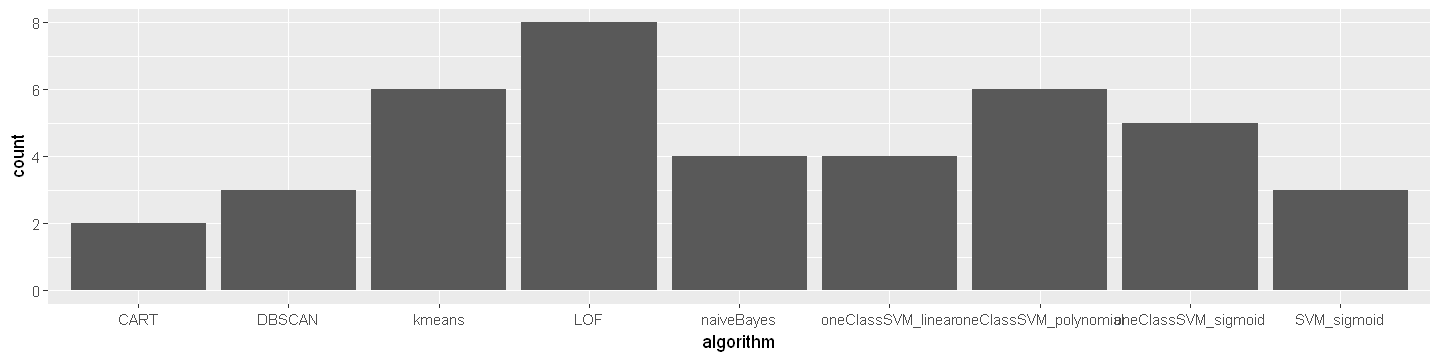

In [112]:
options(repr.plot.width=12, repr.plot.height=3)

calc_worse_random_algorithms() %>% distinct(dataset, algorithm) %>% group_by(algorithm) %>% summarise(count = n())

calc_worse_random_algorithms() %>% filter(algorithm != "random") %>% distinct(dataset, algorithm) %>% group_by(algorithm) %>% summarise(count = n()) %>%
  ggplot(aes(algorithm, count)) + geom_bar(stat = "identity")